In [1]:
import pandas as pd 

data = pd.read_csv(r"C:\Users\pc\Desktop\preprocessed_data.csv")
data

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,0,2,1,28.000000,13.0000,2,3,0
1,1,0,3,1,25.000000,7.6500,2,3,0
2,2,0,3,1,20.000000,7.8542,2,3,0
3,3,0,3,0,29.000000,21.0750,2,3,4
4,4,0,1,1,31.000000,52.0000,2,3,1
...,...,...,...,...,...,...,...,...,...
886,886,1,2,0,14.000000,30.0708,0,3,1
887,887,0,3,1,22.000000,7.2292,0,3,0
888,888,0,3,0,30.000000,8.6625,2,1,0
889,889,0,3,1,29.699118,7.8958,2,3,0


In [2]:
data.isnull().sum()

Unnamed: 0    0
Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
FamilySize    0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  891 non-null    int64  
 1   Survived    891 non-null    int64  
 2   Pclass      891 non-null    int64  
 3   Sex         891 non-null    int64  
 4   Age         891 non-null    float64
 5   Fare        891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.7 KB


#LOGISTIC REGRESSION

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
X = data[["Pclass", "Fare","Sex", "Embarked", "Title", "Age"]]
Y = data["Survived"]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.25, random_state= 0)

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [8]:
Y_pred = logreg.predict(X_test)

In [9]:
print("accuracy : ", logreg.score(X_test,Y_test))

accuracy :  0.7937219730941704


#CONFUSION MATRIX

In [10]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

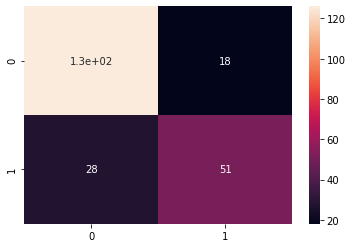

In [11]:
import seaborn as sns

matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix, annot = True)


#ANOTHER METHOD MATRIX 

<AxesSubplot:xlabel='SURVIVED', ylabel='INPUTS'>

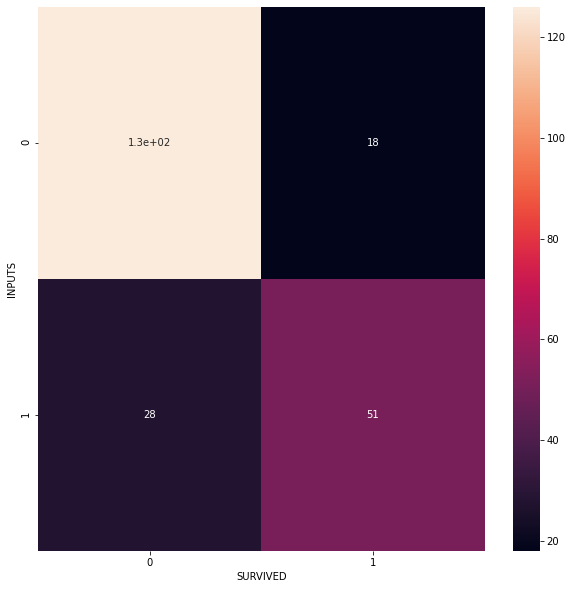

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

matrix1= pd.crosstab(Y_test, Y_pred, rownames = ["INPUTS"], colnames = ["SURVIVED"])
plt.figure(figsize= (10,10))
sns.heatmap(matrix1, annot = True)

In [13]:
from sklearn.metrics import classification_report

In [14]:
print("classification report : \n ", classification_report(Y_test, Y_pred))

classification report : 
                precision    recall  f1-score   support

           0       0.82      0.88      0.85       144
           1       0.74      0.65      0.69        79

    accuracy                           0.79       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.79      0.79      0.79       223



In [15]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#ROC(receiver operating characteristic) :
graph that summerizes all the confusion matrices while changing the threshold.
ROC curves make it easier to identify the best threshhold for making a decision

#AUC(area under the curve):
the area under the ROC curve.and it can help to decide which categorization method in better.

#PLOT ROC

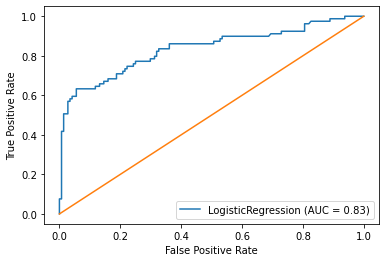

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logreg, X_test, Y_test)
plt.plot([0,1],[0,1])
plt.show()

#ROC AUC SCORE

In [17]:
from sklearn.metrics import roc_auc_score

print(" ROC_AUC score : ", roc_auc_score(Y_test, logreg.predict(X_test)))


 ROC_AUC score :  0.7602848101265822
